# 绘制风场

In [1]:
pwd

'f:\\liyuan3970\\3DVAR_retrive_radar_wind_from_typhoon1909\\ncl\\zdz\\zdz_wind'

In [8]:
import pymssql 
import pandas as pd

## sqlserver
server = "172.21.158.201"    # 连接服务器地址
user = "down"# 连接帐号
password = "downx"# 连接密码
conn = pymssql.connect(server, user, password, "ZJSZDZDB")  #获取连接


## data
sql_location ="select b.lat,b.lon,a.tTime,a.IIiii,a.fFy,a.dFy from TAB_Mws2019 as a left join \
TAB_StationInfo as b on a.IIiii = b.IIiii where(tTime in( '2019-08-09 23:00') and b.Province= '浙江')"

# sql_location ="select b.lat,b.lon,a.IIiii,a.fFy,a.dFy from TAB_Mws2019 as a left join \
# TAB_StationInfo as b on a.IIiii = b.IIiii where(tTime == '2019-08-09 23:00' and '2019-08-10 06:00' and b.Province= '浙江')"


df_location = pd.read_sql(sql_location , con=conn)

#df_location.drop_duplicates(subset=['IIiii'], keep='last', inplace=True)
df_location.to_csv('wind_0809_23.csv')
df_location




# sql_rr = "select b.lat,b.lon,a.IIiii,a.RR from TAB_Mws2019 as a left join TAB_StationInfo as b on a.IIiii = b.IIiii \
# where(tTime between '2019-08-09 23:00' and '2019-08-10 06:00' and (b.City = '台州' and b.Type = '区域站') ) "

# df_rr = pd.read_sql(sql_rr , con=conn)


# # 分组聚合
# grouped = df_rr.groupby(df_rr['IIiii'])
# average_rr = grouped.mean()

# average_rr


# all_rr =pd.merge(df_location,average_rr,on='IIiii')
# all_rr

,lat,lon,tTime,IIiii,fFy,dFy
0,28.450000,119.483333,2019-08-09 23:00:00,K0101,125,313
1,27.983333,119.633333,2019-08-09 23:00:00,K0102,56,143
2,30.266667,120.166667,2019-08-09 23:00:00,K1001,17,42
3,30.366667,120.133333,2019-08-09 23:00:00,K1002,83,27
4,30.300000,120.333333,2019-08-09 23:00:00,K1003,116,33
...,...,...,...,...,...,...
2927,30.316667,122.016667,2019-08-09 23:00:00,K9727,280,61
2928,30.216667,121.883333,2019-08-09 23:00:00,K9728,276,102
2929,29.720000,122.150000,2019-08-09 23:00:00,K9735,274,113
2930,30.770000,122.650000,2019-08-09 23:00:00,K9739,277,83


In [23]:
import pymssql 
import pandas as pd

## sqlserver
server = "172.21.158.201"    # 连接服务器地址
user = "down"# 连接帐号
password = "downx"# 连接密码
conn = pymssql.connect(server, user, password, "ZJSZDZDB")  #获取连接


## data
sql_location ="select b.lat,b.lon,a.tTime,a.IIiii,a.fFy,a.dFy from TAB_Mws2019 as a left join \
TAB_StationInfo as b on a.IIiii = b.IIiii where(tTime in( '2019-08-10 09:00') and b.Province= '浙江')"

# sql_location ="select b.lat,b.lon,a.IIiii,a.fFy,a.dFy from TAB_Mws2019 as a left join \
# TAB_StationInfo as b on a.IIiii = b.IIiii where(tTime == '2019-08-09 23:00' and '2019-08-10 06:00' and b.Province= '浙江')"


df_location = pd.read_sql(sql_location , con=conn)

#df_location.drop_duplicates(subset=['IIiii'], keep='last', inplace=True)
df_location.to_csv('wind_0810_09.csv')
df_location




# sql_rr = "select b.lat,b.lon,a.IIiii,a.RR from TAB_Mws2019 as a left join TAB_StationInfo as b on a.IIiii = b.IIiii \
# where(tTime between '2019-08-09 23:00' and '2019-08-10 06:00' and (b.City = '台州' and b.Type = '区域站') ) "

# df_rr = pd.read_sql(sql_rr , con=conn)


# # 分组聚合
# grouped = df_rr.groupby(df_rr['IIiii'])
# average_rr = grouped.mean()

# average_rr


# all_rr =pd.merge(df_location,average_rr,on='IIiii')
# all_rr

,lat,lon,tTime,IIiii,fFy,dFy
0,28.450000,119.483333,2019-08-10 09:00:00,K0101,56,287
1,27.983333,119.633333,2019-08-10 09:00:00,K0102,70,140
2,30.266667,120.166667,2019-08-10 09:00:00,K1001,20,234
3,30.366667,120.133333,2019-08-10 09:00:00,K1002,132,27
4,30.300000,120.333333,2019-08-10 09:00:00,K1003,207,61
...,...,...,...,...,...,...
2914,30.216667,121.883333,2019-08-10 09:00:00,K9728,316,122
2915,29.883333,122.233333,2019-08-10 09:00:00,K9729,330,117
2916,29.720000,122.150000,2019-08-10 09:00:00,K9735,301,121
2917,30.770000,122.650000,2019-08-10 09:00:00,K9739,297,101


In [10]:
pwd

'/workspace/liyuan3970/3DVAR_retrive_radar_wind_from_typhoon1909/ncl/zdz/zdz_wind'

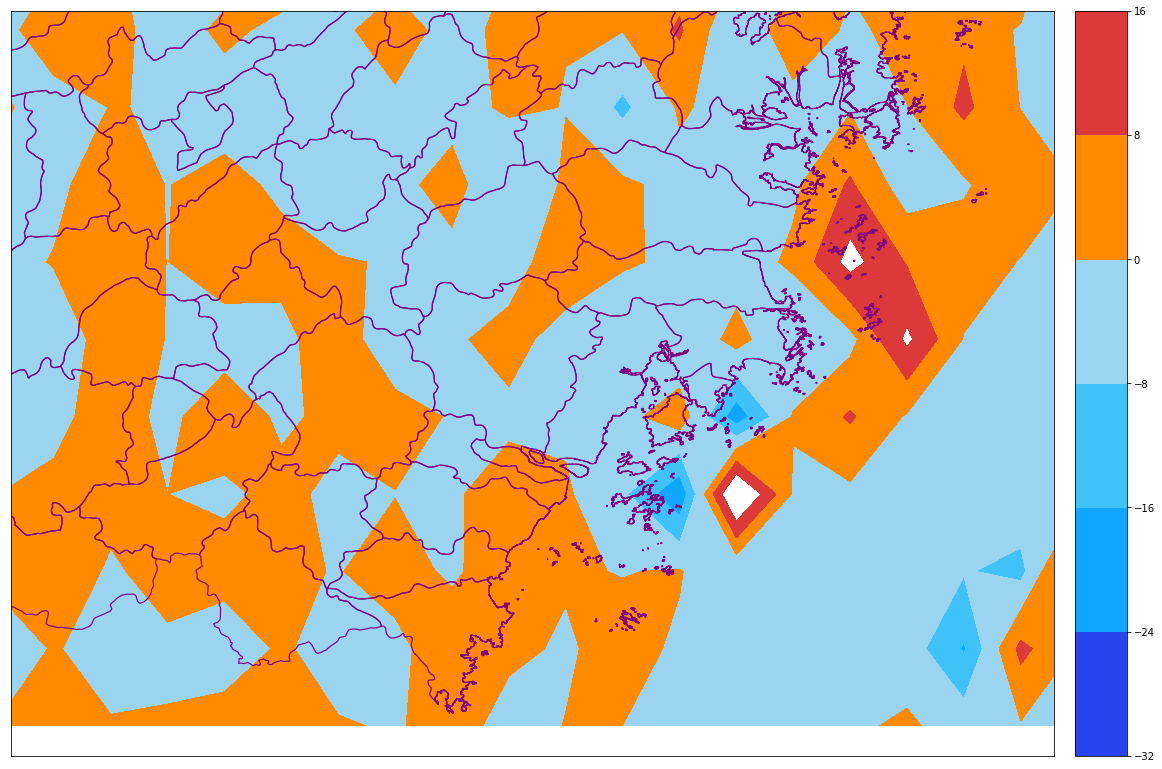

In [13]:
# 局地地形的
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import netCDF4 

from ncmaps import Cmaps

from matplotlib import cm
from ncmaps import Cmaps
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
self_define_list = [33,53,74,93,110,130,180,240]
rgb_file = 'ncl_default'
#以下是核心api,实质为调用Cmaps基类的listmap()方法
cmaps = Cmaps('ncl_default',self_define_list).listmap()




f = netCDF4.Dataset('zdz_dv.nc')

dv =  f.variables['dv'][:,:]*10000
lat = f.variables['lat']
lon = f.variables['lon']



box = [118, 123.5, 26, 30]
scale = '10m'
xstep, ystep = 0.5, 0.5
fig = plt.figure(figsize=(20, 15))

from mpl_toolkits.basemap import Basemap
m = Basemap(llcrnrlon=119,llcrnrlat=27.0,urcrnrlon=122.5,urcrnrlat=29.5)


fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang.shp'
fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang'


# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
#ax.quiver(lon[::3],lat[::3],u[::3,::3], v[::3,::3], transform=ccrs.PlateCarree())

#levels = [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800]
levels = [-32,-24,-16,-8,0,8,16]
lons, lats = np.meshgrid(lon[::5], lat[::5])





shade = m.contourf(lons,lats,dv[::5,::5],cmap=cmaps,levels=levels)
#shade = m.contourf(lons,lats,dv[::5,::5])
m.readshapefile(fname,'zhejiang',color='purple',linewidth=1.2)

m.colorbar(shade)

# 绘制时间分布

# 括苍山

[array(0.00028909, dtype=float32), array(0.00033063, dtype=float32), array(0.00024452, dtype=float32), array(0.00058975, dtype=float32), array(0.00011372, dtype=float32), array(2.3508926e-05, dtype=float32), array(0.00025808, dtype=float32), array(-0.00057422, dtype=float32), array(-0.0010833, dtype=float32), array(-0.00075397, dtype=float32), array(-7.9113655e-05, dtype=float32)]


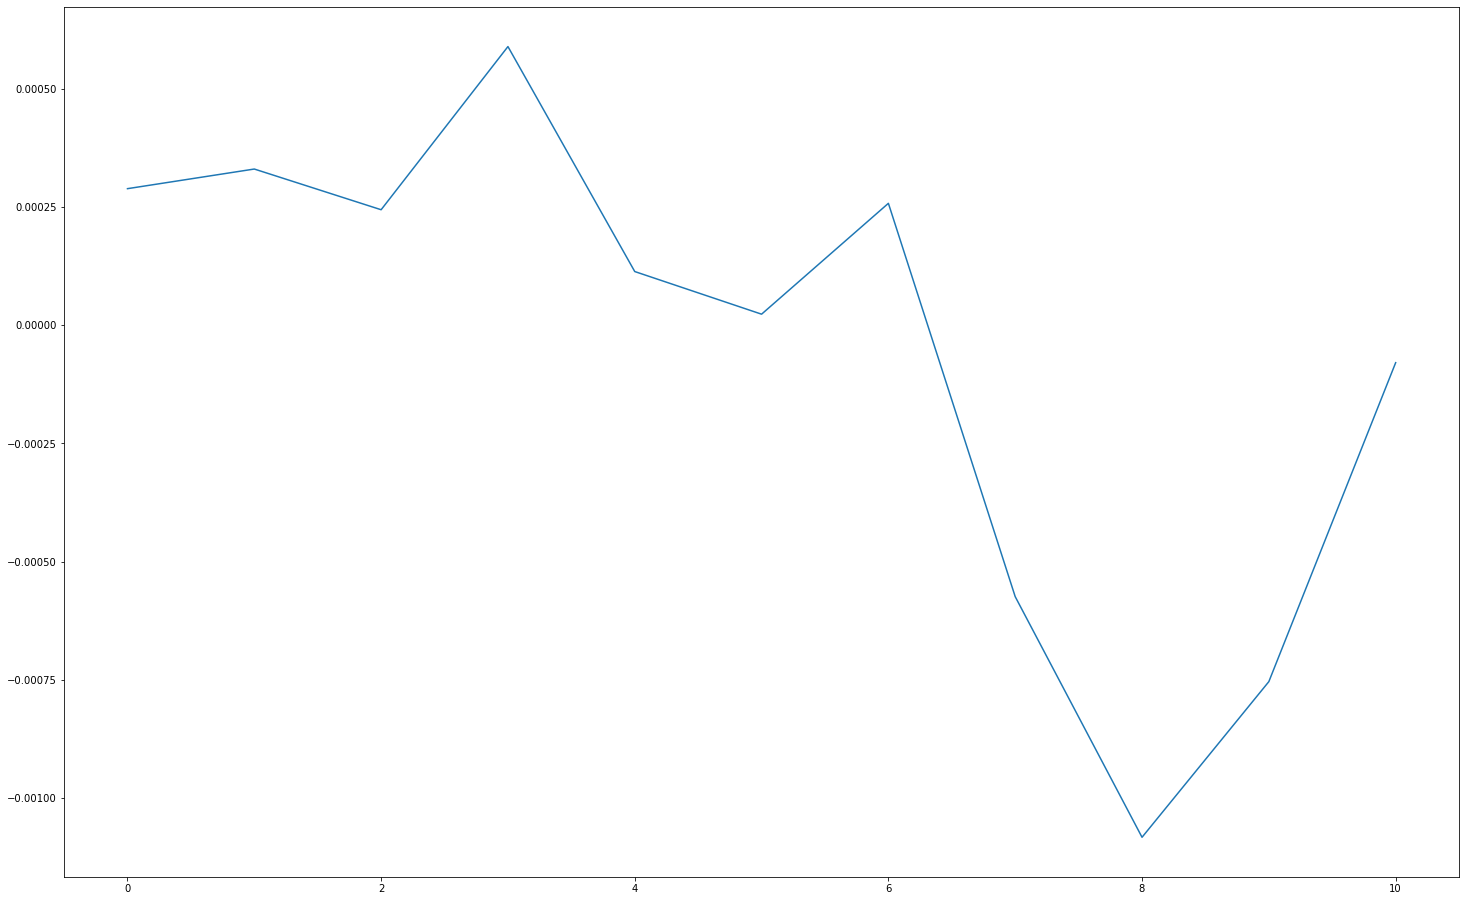

In [15]:
### import numpy as np

import xarray as xr

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

%matplotlib inline
filepath =  "/home/liyuan3970/3DVAR_retrive_radar_wind_from_typhoon1909/ncl/zdz/zdz_wind/dv_all.nc"
f = xr.open_dataset(filepath,decode_times=False)
dvlist  = []
def comput():
    for i in range(11):
        dv = f.dv[i,:,:]
        da = dv.sel(lat=slice(28.65,28.80), lon=slice(120.8, 121.0))
        av = da.mean()
        dvlist.append(av.data)
comput()        
print(dvlist) 

fig = plt.figure(figsize = (25, 16))
plt.plot(dvlist)
plt.show()

# 整体趋势

[array(-0.00041113, dtype=float32), array(-0.00033796, dtype=float32), array(-0.00056841, dtype=float32), array(-0.0009023, dtype=float32), array(-0.00121554, dtype=float32), array(-0.00120141, dtype=float32), array(-0.0008519, dtype=float32), array(-0.00027322, dtype=float32), array(-5.3089556e-05, dtype=float32), array(7.682435e-05, dtype=float32), array(0.00013351, dtype=float32)]


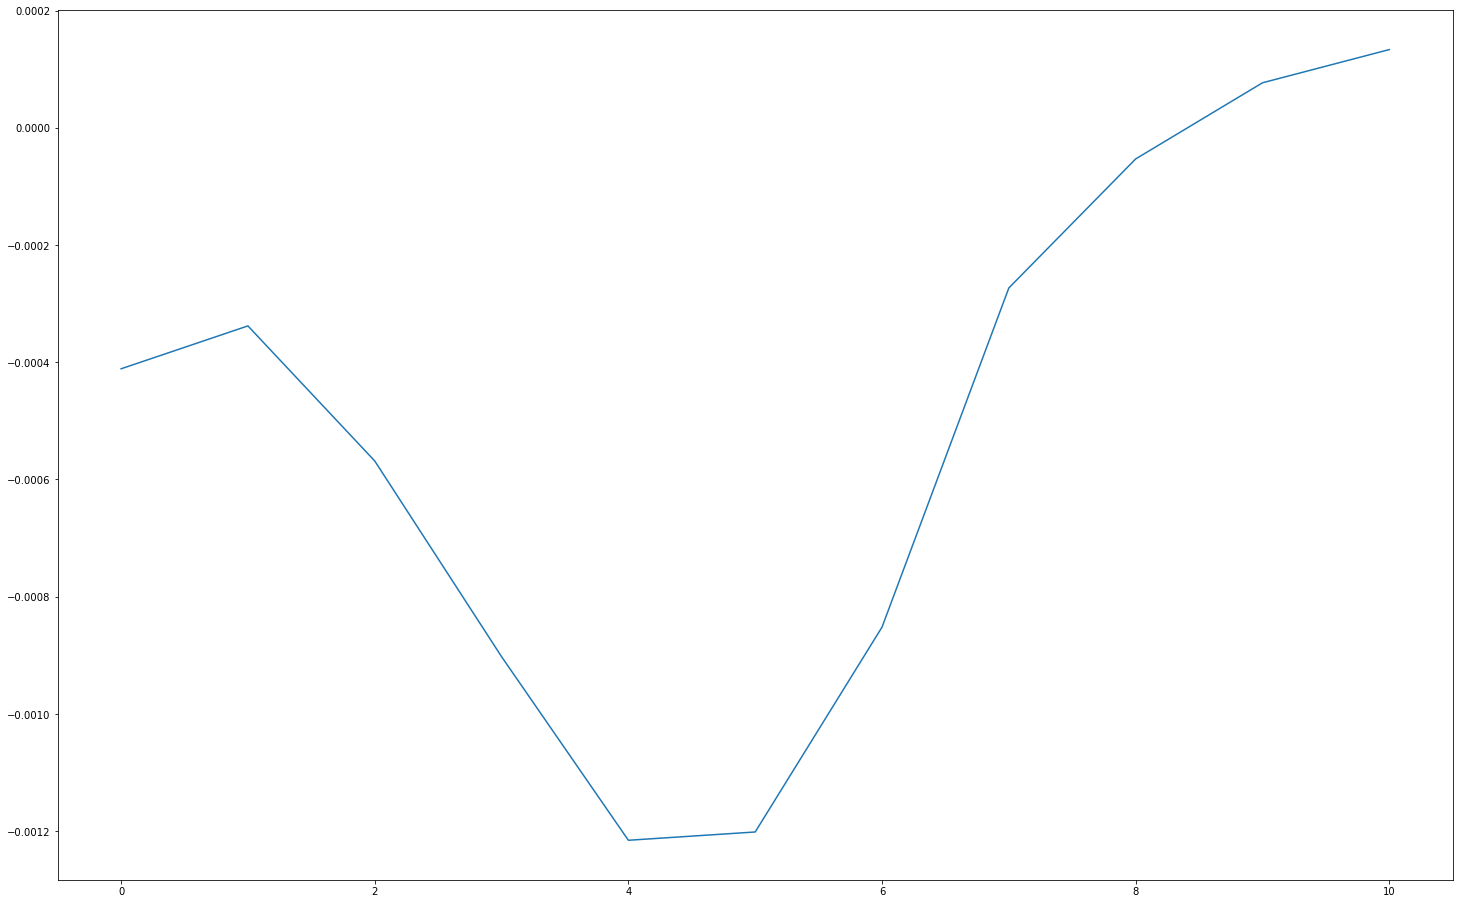

In [27]:
### import numpy as np

import xarray as xr

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

%matplotlib inline
filepath =  "/home/liyuan3970/3DVAR_retrive_radar_wind_from_typhoon1909/ncl/zdz/zdz_wind/dv_all.nc"
f = xr.open_dataset(filepath,decode_times=False)
dvlist  = []
def comput():
    for i in range(11):
        dv = f.dv[i,:,:]
        da = dv.sel(lat=slice(28.3,28.5), lon=slice(120.9, 121.4))
        av = da.mean()
        dvlist.append(av.data)
comput()        
print(dvlist) 

fig = plt.figure(figsize = (25, 16))
plt.plot(dvlist)
plt.show()

# 黄岩趋势

[array(-0.00070142, dtype=float32), array(-0.00073254, dtype=float32), array(-0.00088085, dtype=float32), array(-0.00127835, dtype=float32), array(-0.00140136, dtype=float32), array(-0.00136516, dtype=float32), array(-0.00154034, dtype=float32), array(-0.00071982, dtype=float32), array(-0.00017737, dtype=float32), array(0.00015162, dtype=float32), array(4.1076604e-05, dtype=float32)]


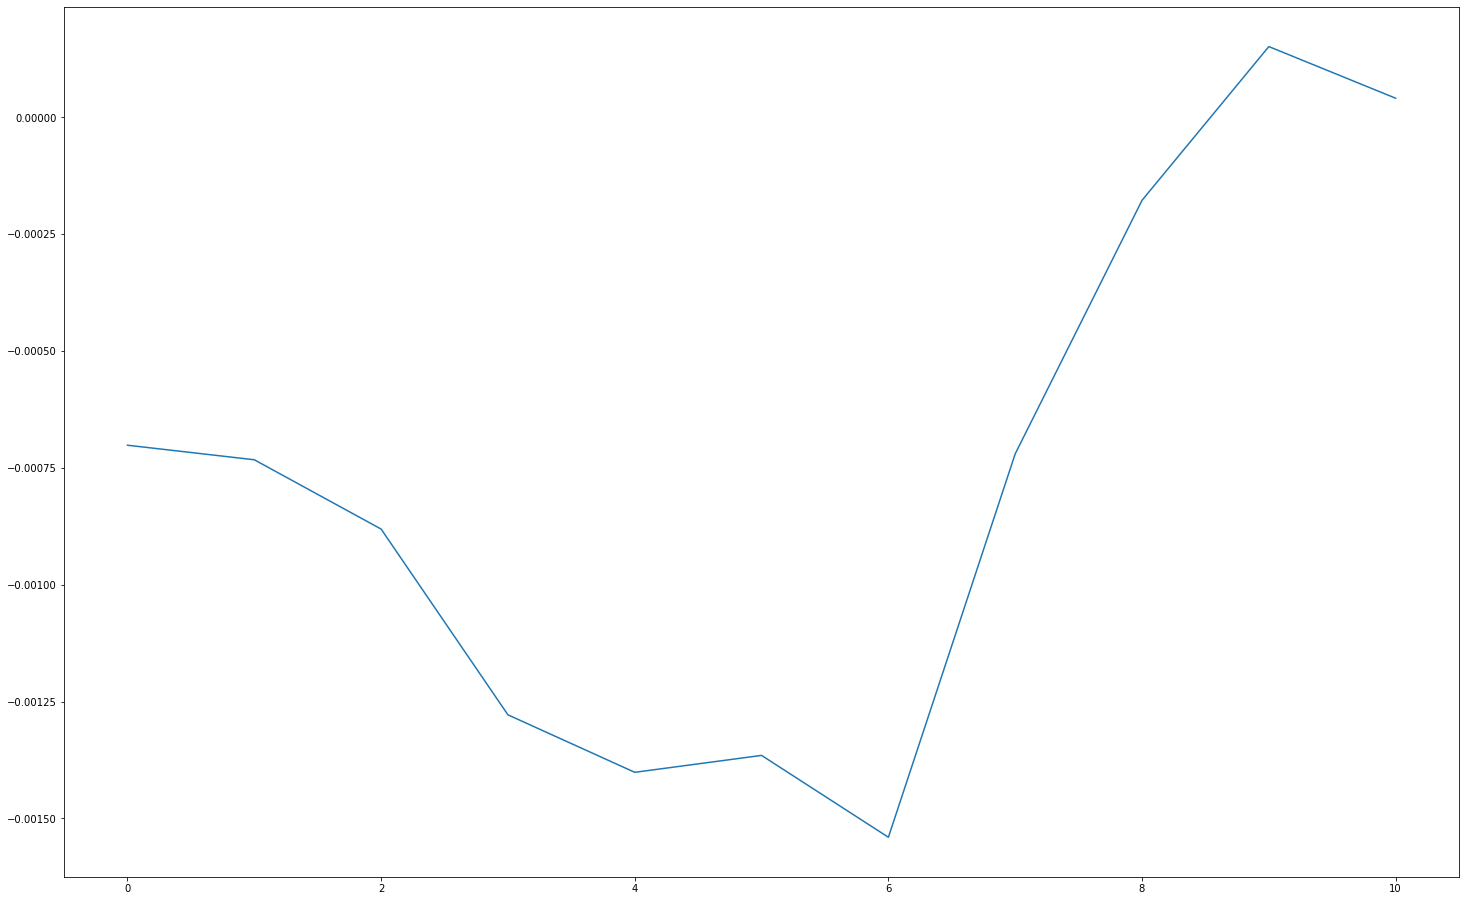

In [18]:
### import numpy as np

import xarray as xr

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

%matplotlib inline
filepath =  "/home/liyuan3970/3DVAR_retrive_radar_wind_from_typhoon1909/ncl/zdz/zdz_wind/dv_all.nc"
f = xr.open_dataset(filepath,decode_times=False)
dvlist  = []
def comput():
    for i in range(11):
        dv = f.dv[i,:,:]
        da = dv.sel(lat=slice(28.36,28.55), lon=slice(120.80, 121.1))
        av = da.mean()
        dvlist.append(av.data)
comput()        
print(dvlist) 

fig = plt.figure(figsize = (25, 16))
plt.plot(dvlist)
plt.show()

# 黄岩局部

[array(-0.00054701, dtype=float32), array(-0.00062769, dtype=float32), array(-0.00073179, dtype=float32), array(-0.000953, dtype=float32), array(-0.00095169, dtype=float32), array(-0.00105709, dtype=float32), array(-0.0012686, dtype=float32), array(-0.00081352, dtype=float32), array(-0.0004931, dtype=float32), array(9.420052e-06, dtype=float32), array(-6.6086795e-05, dtype=float32)]


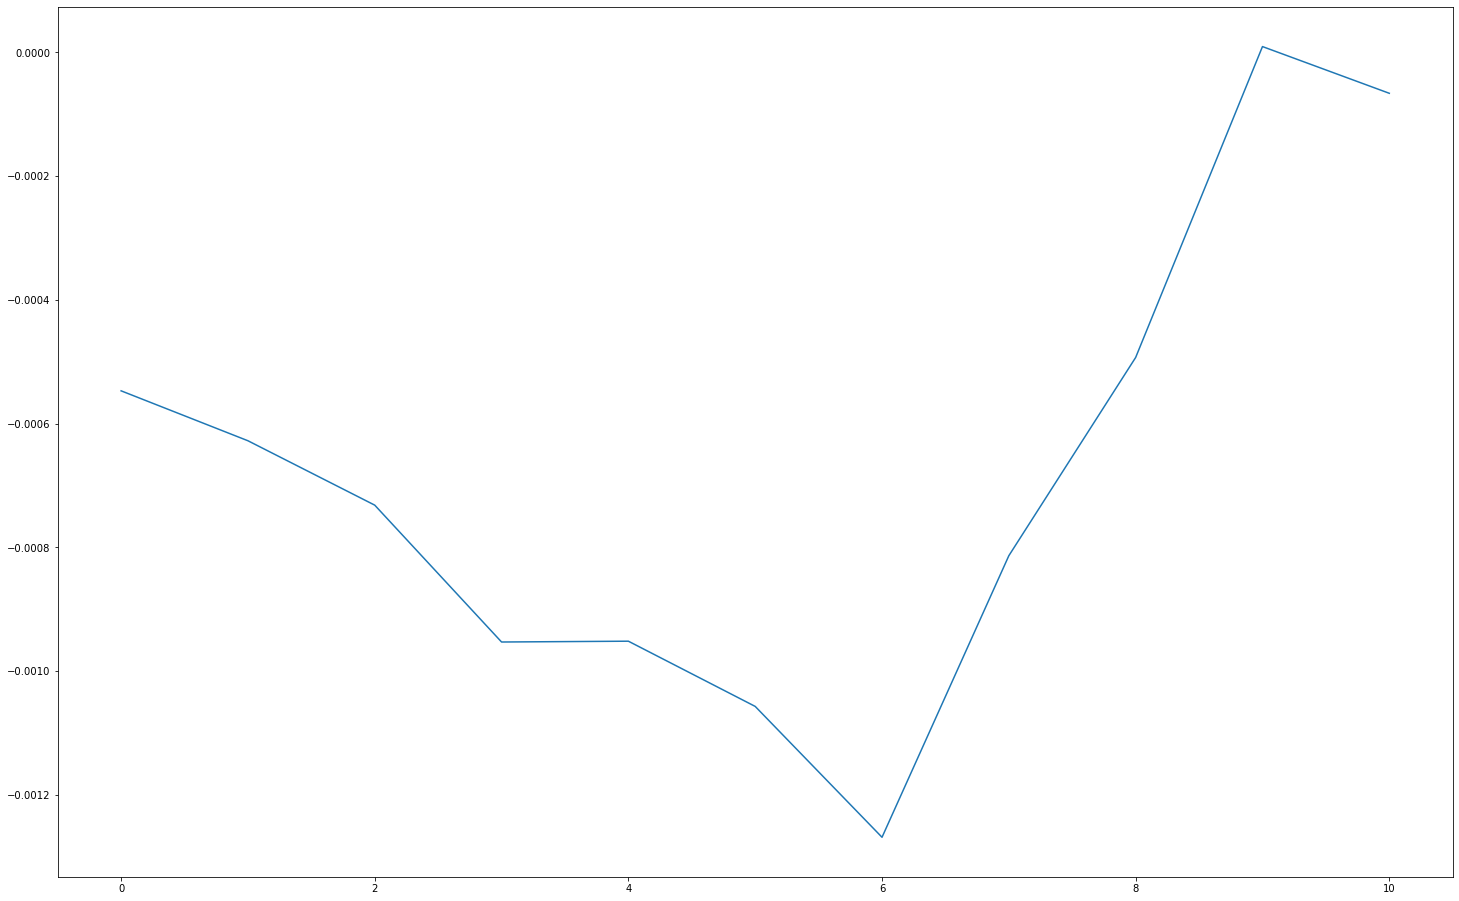

In [6]:
### import numpy as np

import xarray as xr

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

%matplotlib inline
filepath =  "/home/liyuan3970/3DVAR_retrive_radar_wind_from_typhoon1909/ncl/zdz/zdz_wind/dv_all.nc"
f = xr.open_dataset(filepath,decode_times=False)
dvlist  = []
def comput():
    for i in range(11):
        dv = f.dv[i,:,:]
        da = dv.sel(lat=slice(28.4,28.65), lon=slice(120.75, 121.2))
        av = da.mean()
        dvlist.append(av.data)
comput()        
print(dvlist) 

fig = plt.figure(figsize = (25, 16))
plt.plot(dvlist)
plt.show()

# 玉环散度

[array(-0.00047516, dtype=float32), array(-0.0004135, dtype=float32), array(-0.00077978, dtype=float32), array(-0.00112185, dtype=float32), array(-0.00134776, dtype=float32), array(-0.00138761, dtype=float32), array(-0.0002885, dtype=float32), array(0.00022933, dtype=float32), array(0.00021162, dtype=float32), array(0.00037815, dtype=float32), array(0.00036696, dtype=float32)]


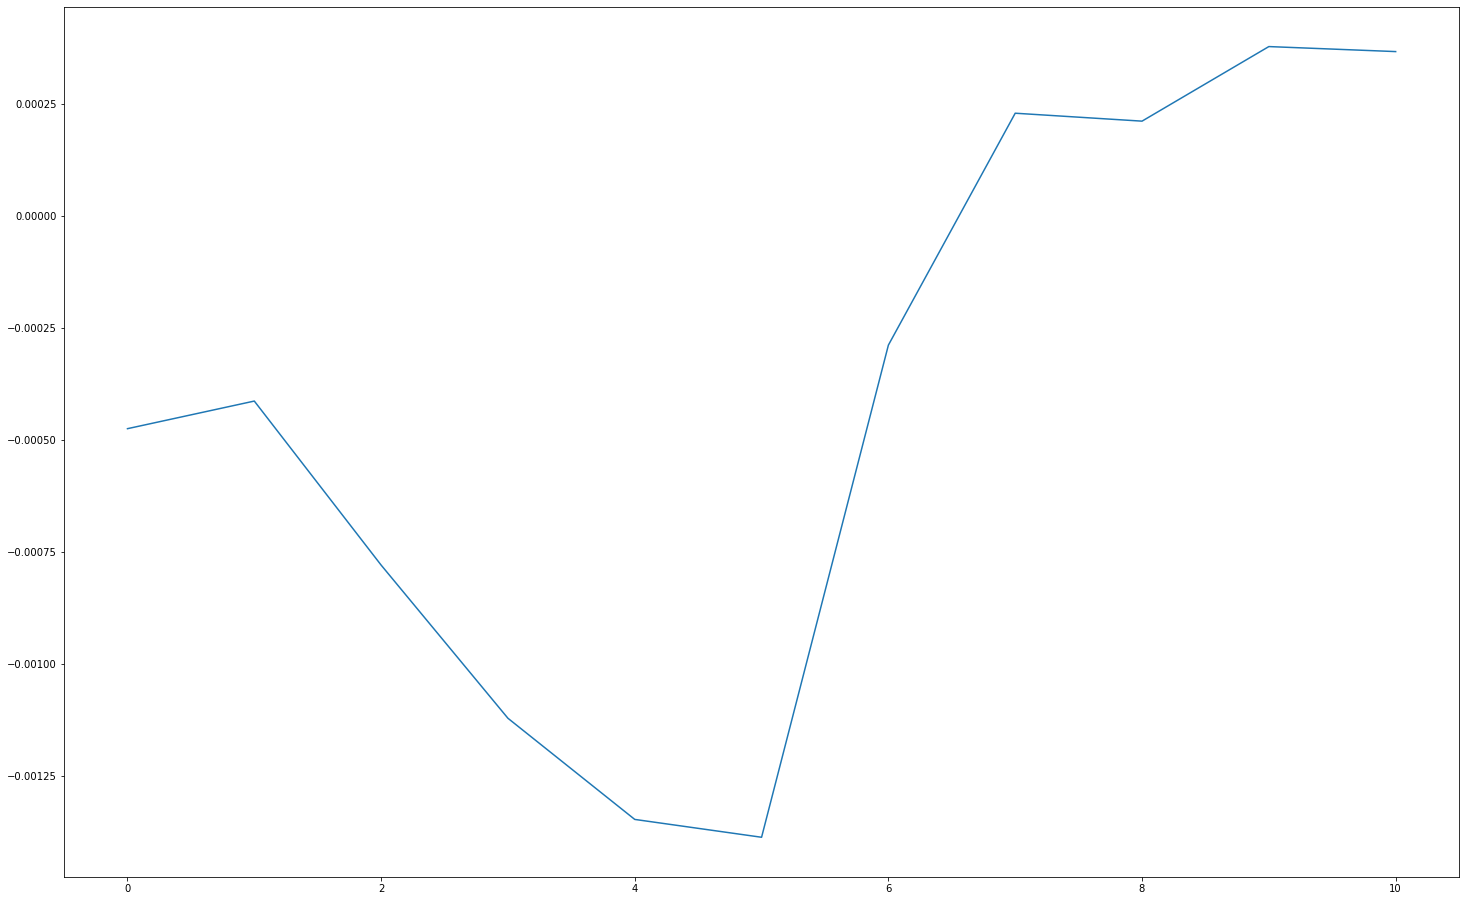

In [20]:
### import numpy as np

import xarray as xr

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

%matplotlib inline
filepath =  "/home/liyuan3970/3DVAR_retrive_radar_wind_from_typhoon1909/ncl/zdz/zdz_wind/dv_all.nc"
f = xr.open_dataset(filepath,decode_times=False)
dvlist  = []
def comput():
    for i in range(11):
        dv = f.dv[i,:,:]
        da = dv.sel(lat=slice(28.35,28.45), lon=slice(121.10, 121.4))
        av = da.mean()
        dvlist.append(av.data)
comput()        
print(dvlist) 

fig = plt.figure(figsize = (25, 16))
plt.plot(dvlist)
plt.show()

# 绘制逐小时地面自动站散度的数据

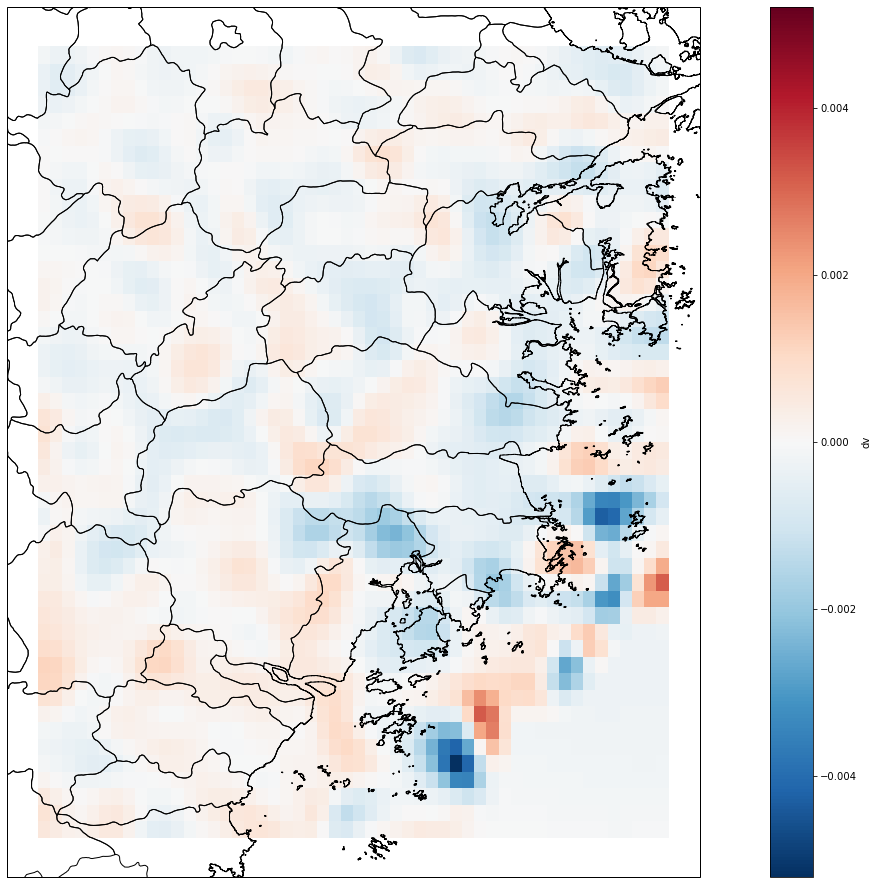

Type:            GeoAxesSubplot
String form:     < GeoAxes: <cartopy.crs.PlateCarree object at 0x7f9aedd14470> >
File:            /opt/conda/lib/python3.7/site-packages/Cartopy-0.17.0-py3.7-linux-x86_64.egg/cartopy/mpl/geoaxes.py
Docstring:       <no docstring>
Class docstring:
Base class for subplots, which are :class:`Axes` instances with
additional methods to facilitate generating and manipulating a set
of :class:`Axes` within a figure.
Init docstring: 
*fig* is a :class:`matplotlib.figure.Figure` instance.

*args* is the tuple (*numRows*, *numCols*, *plotNum*), where
the array of subplots in the figure has dimensions *numRows*,
*numCols*, and where *plotNum* is the number of the subplot
being created.  *plotNum* starts at 1 in the upper left
corner and increases to the right.

If *numRows* <= *numCols* <= *plotNum* < 10, *args* can be the
decimal integer *numRows* * 100 + *numCols* * 10 + *plotNum*.


In [17]:
import numpy as np

import xarray as xr

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

%matplotlib inline


filepath = "/home/liyuan3970/3DVAR_retrive_radar_wind_from_typhoon1909/ncl/zdz/zdz_wind/dv_all.nc"

f = xr.open_dataset(filepath,decode_times=False)

dv = f.dv[3,:,:]
da = dv.sel(lat=slice(27.5,30), lon=slice(120, 122))

stamen_terrain = cimgt.Stamen('terrain-background')
fig = plt.figure(figsize = (25, 16))
#ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)
ax = plt.axes(projection=ccrs.PlateCarree())

filename = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang.shp'# from https://earthworks.stanford.edu/catalog/stanford-vj593xs7263
shape_feature = ShapelyFeature(Reader(filename).geometries(), ccrs.PlateCarree(), edgecolor='black', facecolor='none')

ax.add_feature(shape_feature, zorder = 10)
ax?
plt.title("liyuan")
# ax.add_feature?
#plt.show()
da.plot(label="liyuan")

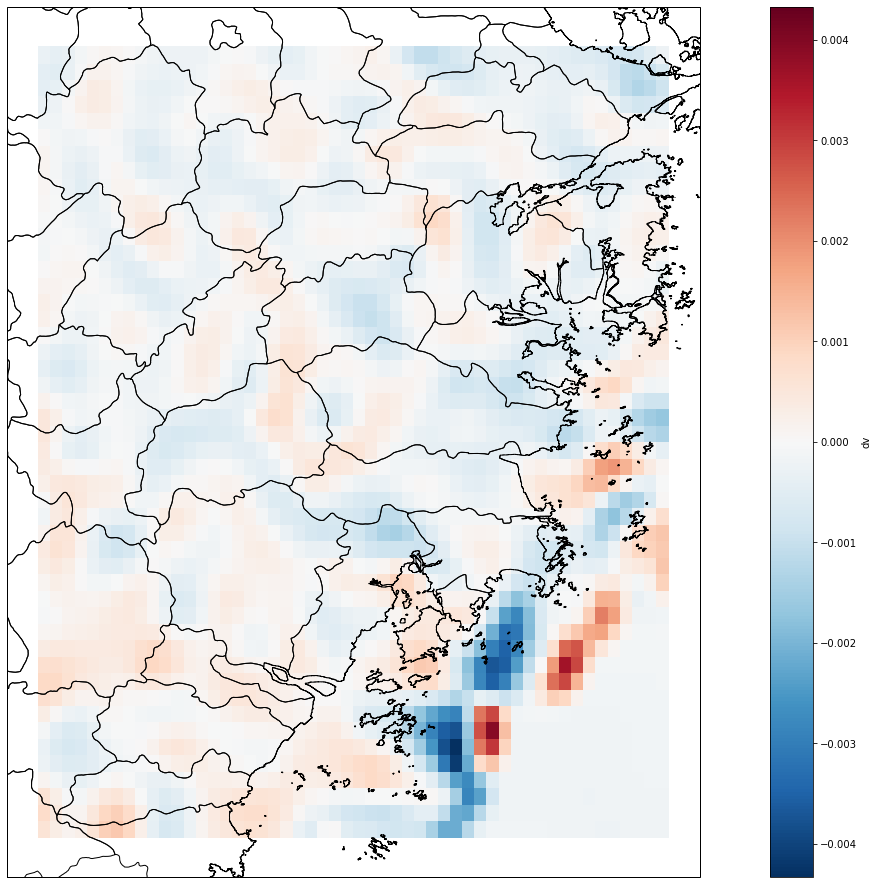

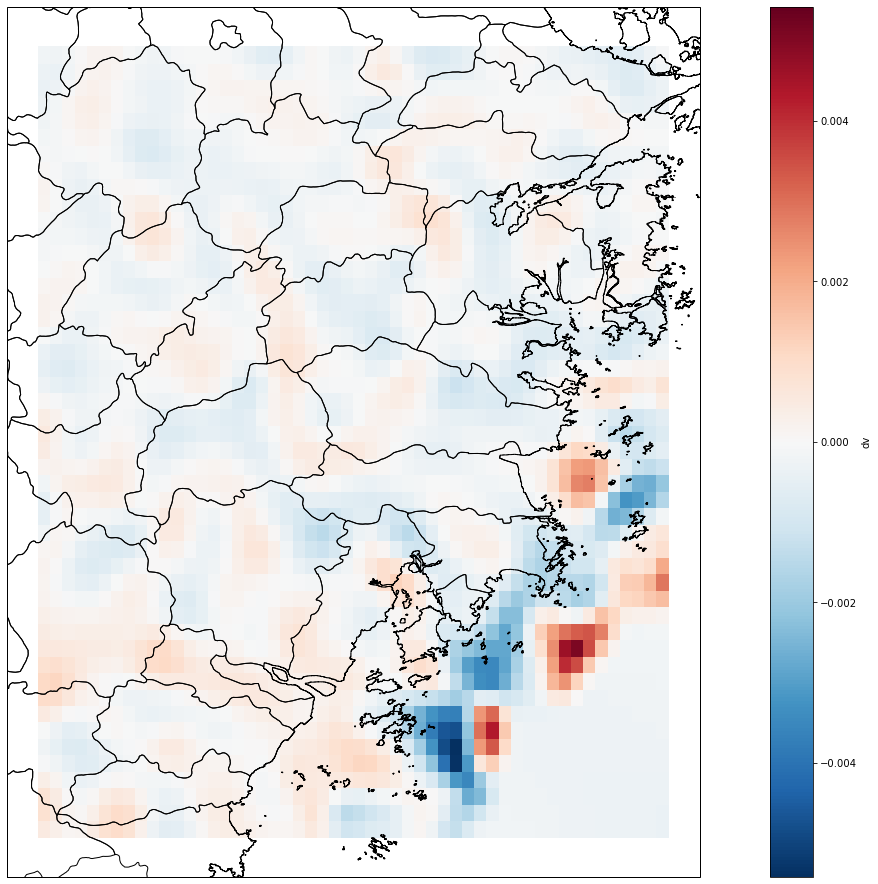

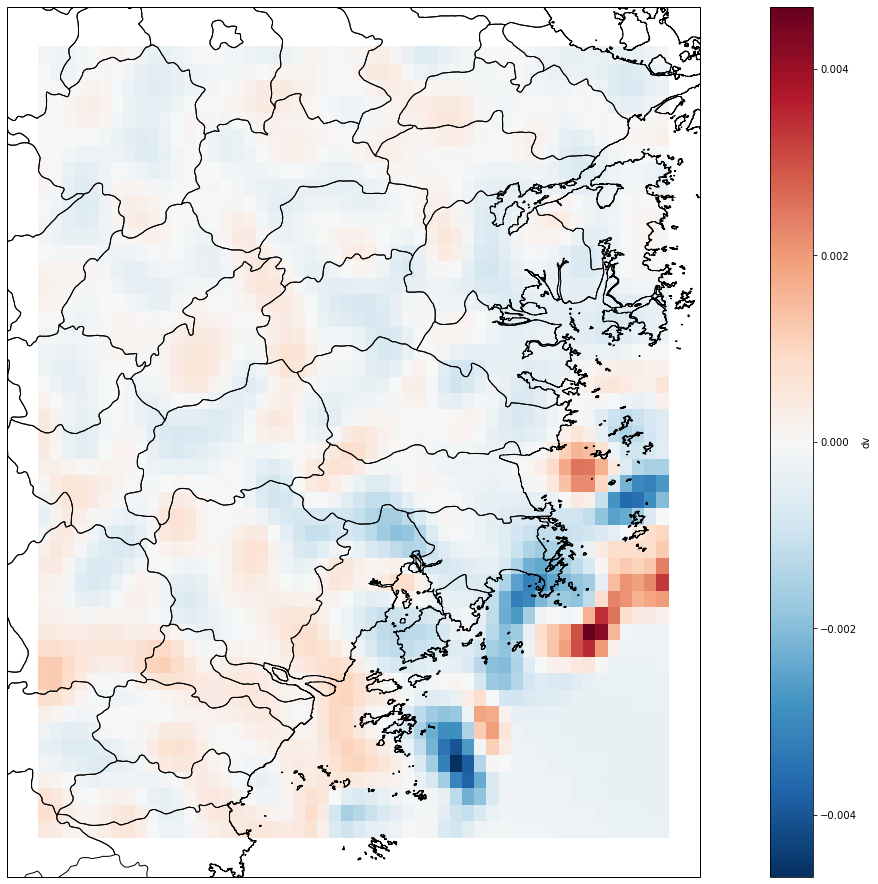

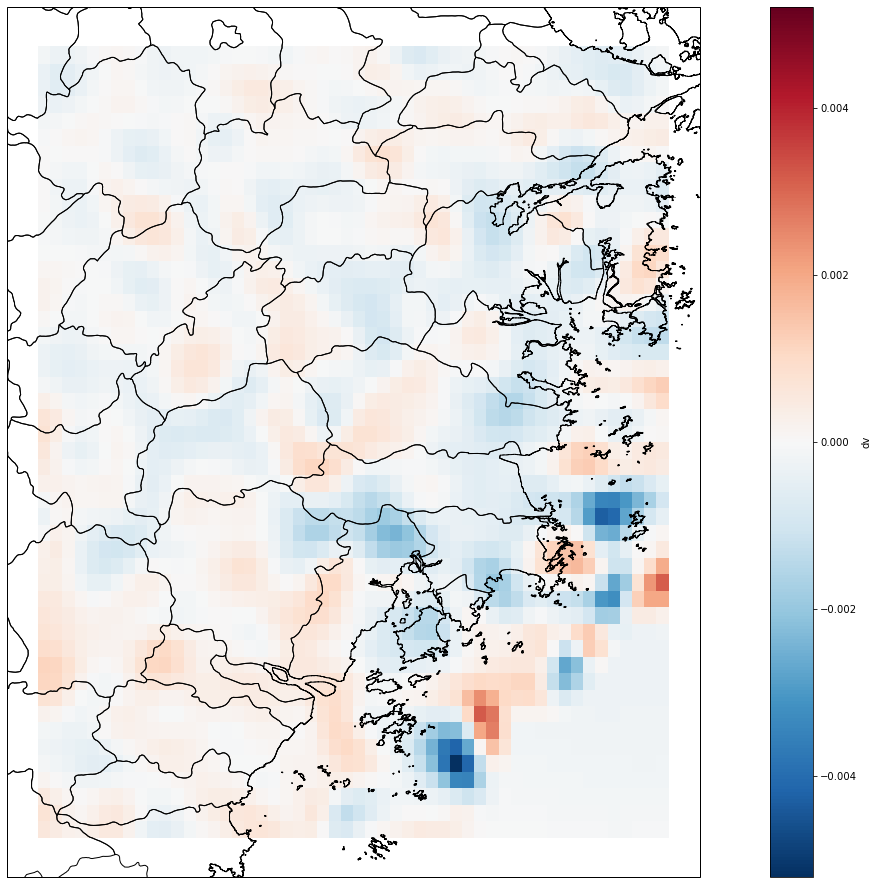

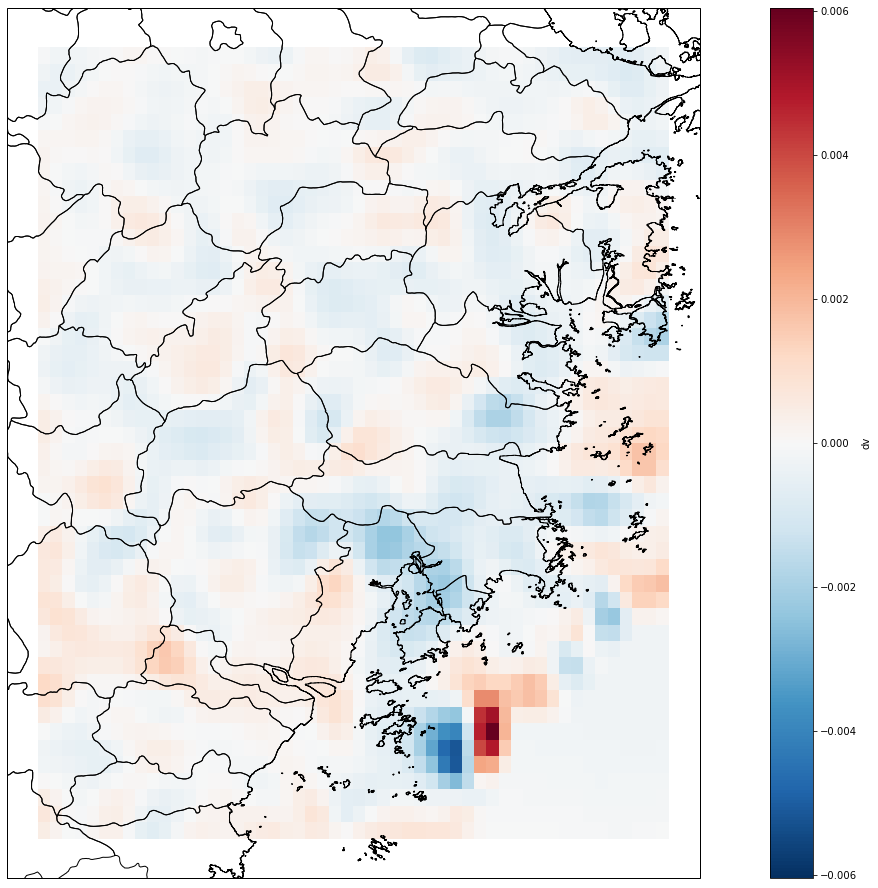

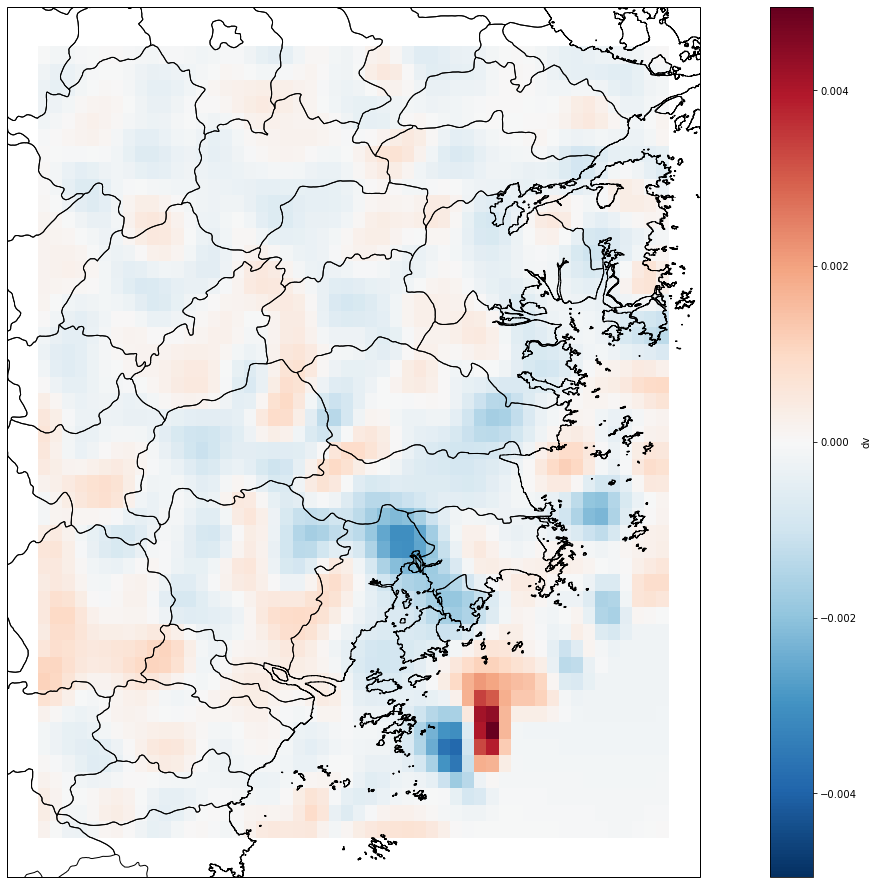

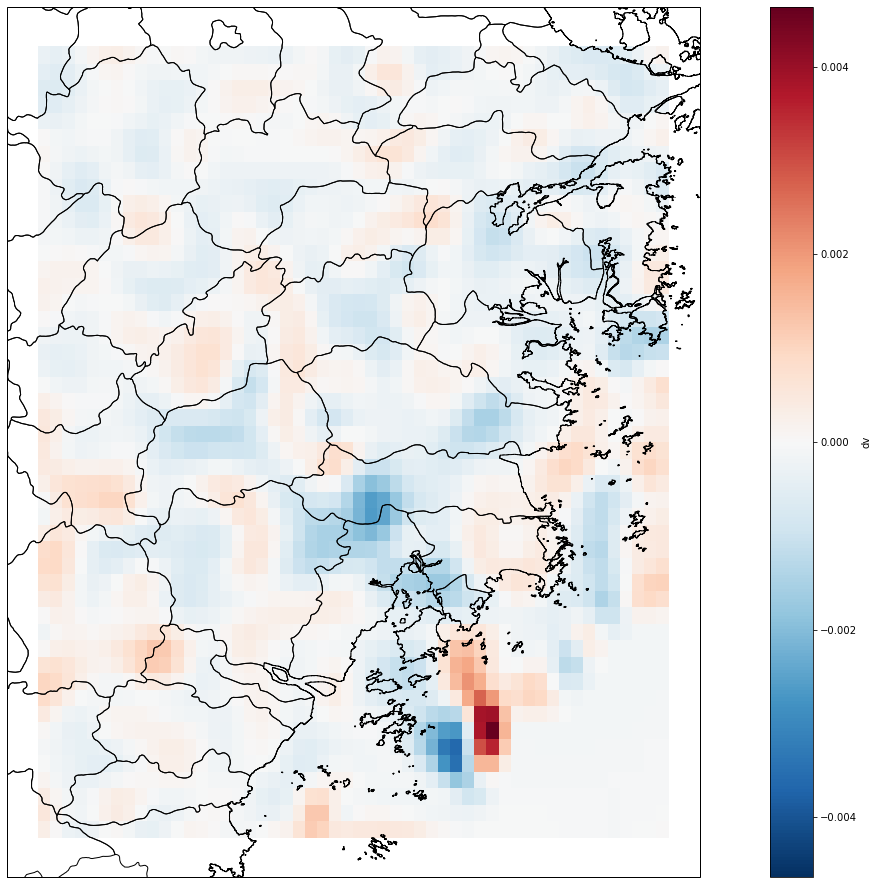

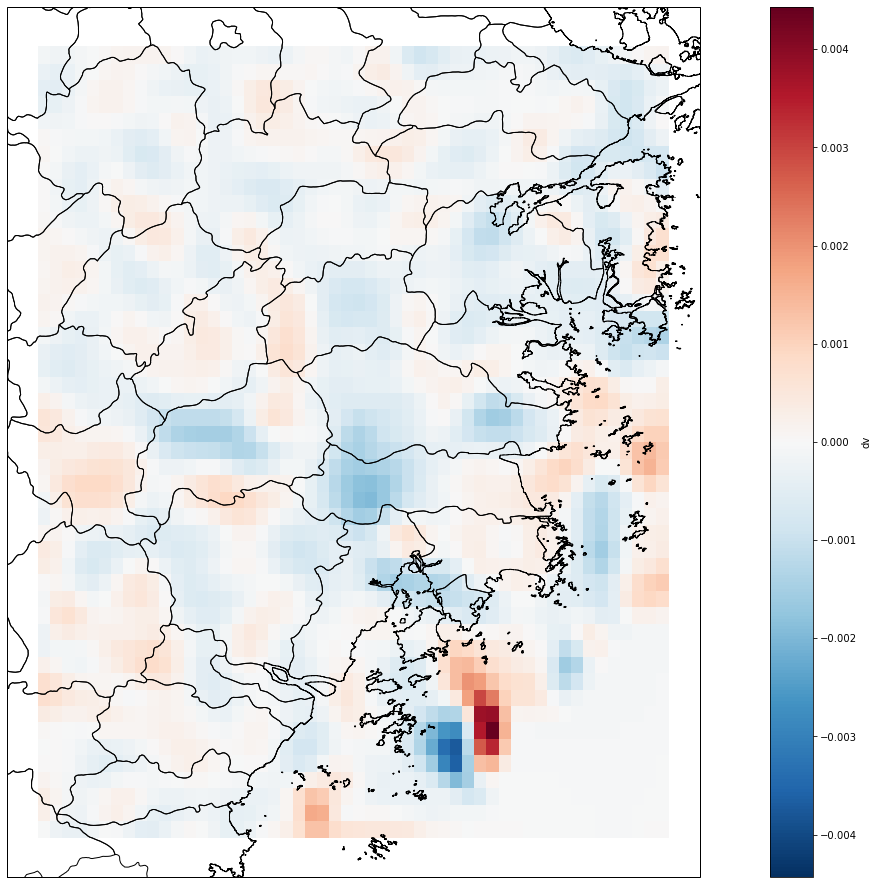

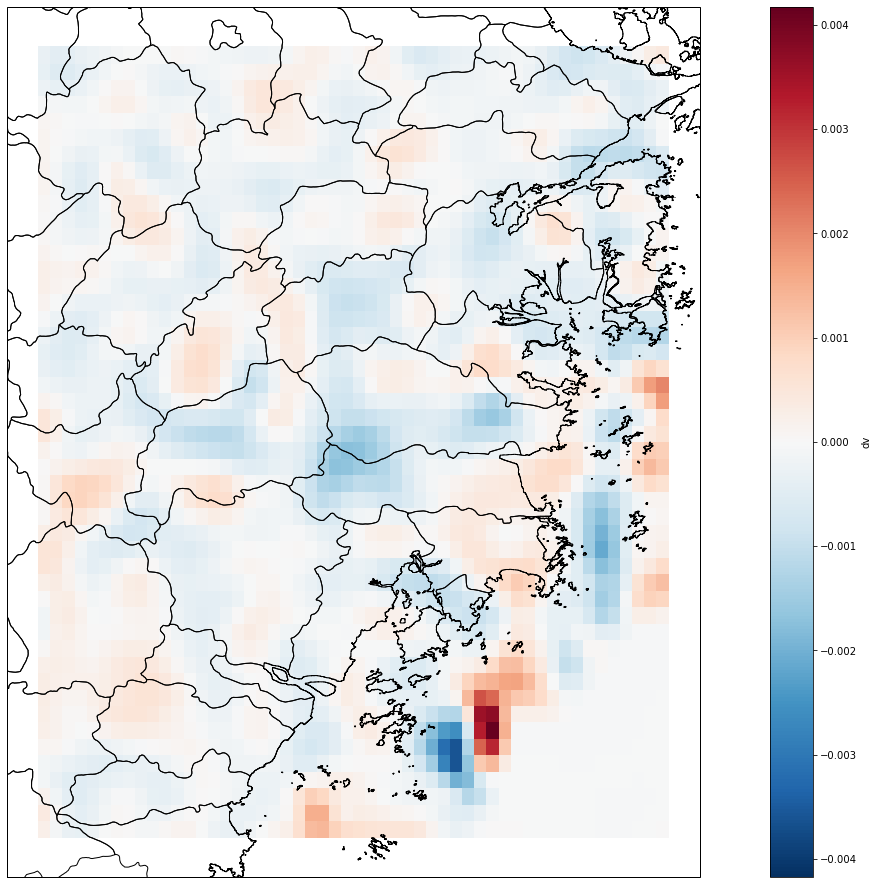

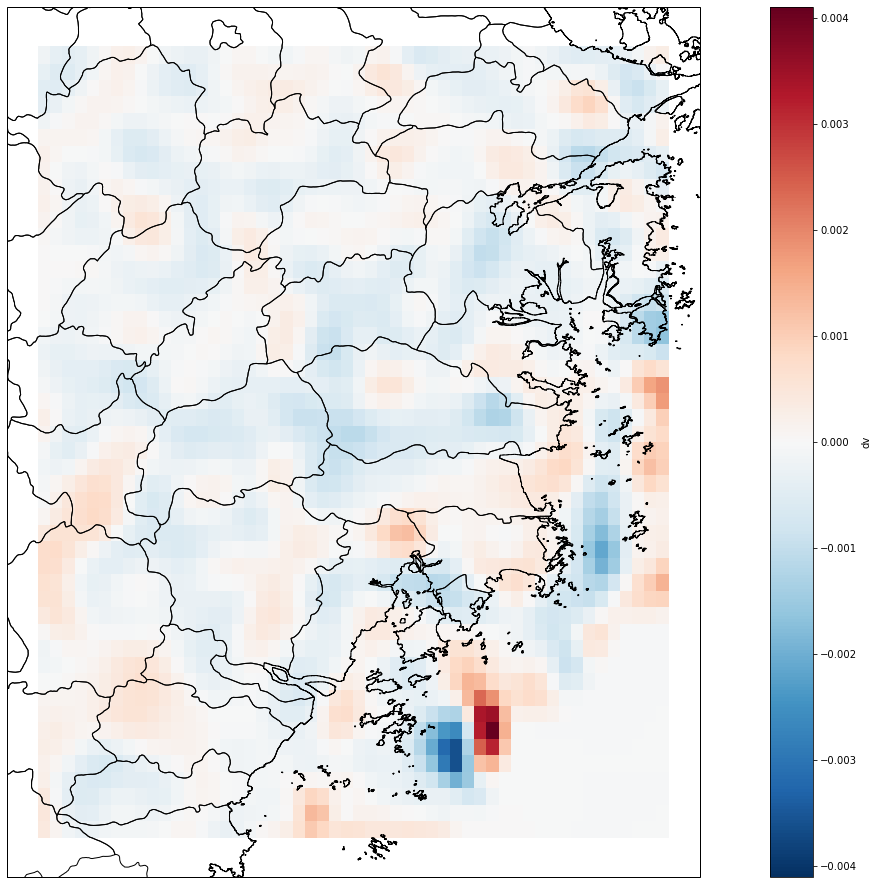

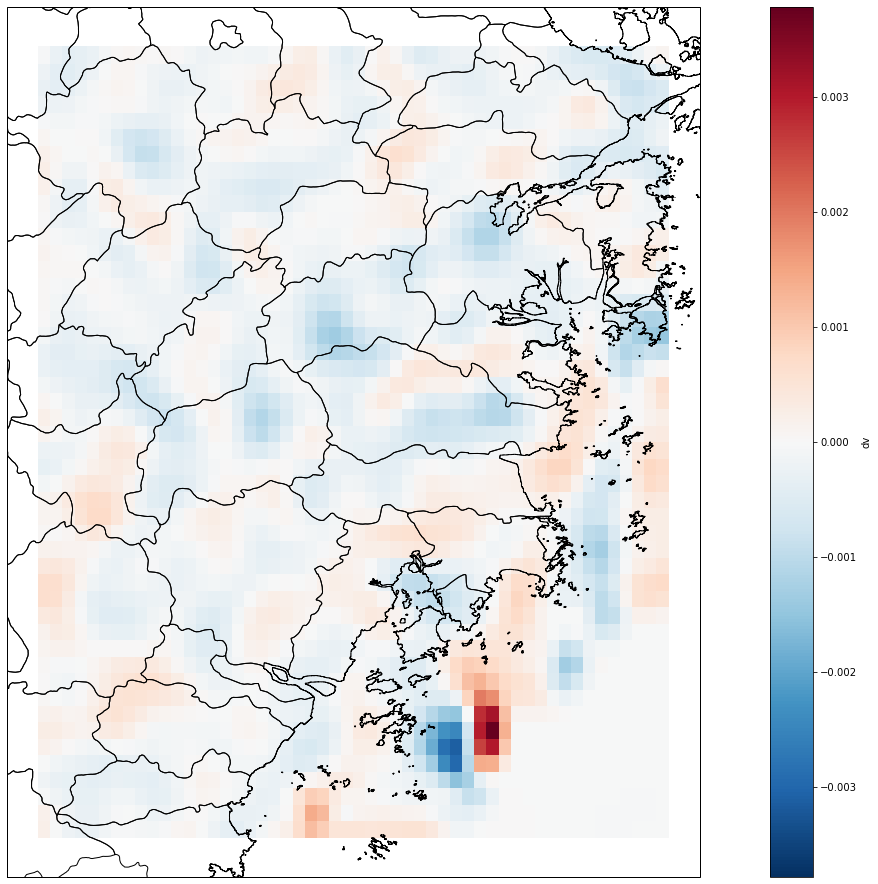

In [1]:
import numpy as np

import xarray as xr

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

%matplotlib inline


filepath = "/home/liyuan3970/3DVAR_retrive_radar_wind_from_typhoon1909/ncl/zdz/zdz_wind/dv_all.nc"

f = xr.open_dataset(filepath,decode_times=False)


for i in range(11):
    dv = f.dv[i,:,:]
    da = dv.sel(lat=slice(27.5,30), lon=slice(120, 122))
    
    stamen_terrain = cimgt.Stamen('terrain-background')
    fig = plt.figure(figsize = (25, 16))
    #ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)
    ax = plt.axes(projection=ccrs.PlateCarree())
    time = ['23','00','01','02','03','04','05','06','07','08','09']
    filename = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang.shp'# from https://earthworks.stanford.edu/catalog/stanford-vj593xs7263
    shape_feature = ShapelyFeature(Reader(filename).geometries(), ccrs.PlateCarree(), edgecolor='black', facecolor='none')
    
    ax.add_feature(shape_feature, zorder = 10)
    
    # ax.add_feature?
    #plt.show()
    da.plot()
    